# Trump Tweets & Market Volatility

A supervised approach to classify and design a trading strategy for one day direction move of multiple assets using information obtained from Trump's tweets, along with futures, options and other financial market data 

## Problem Statement and Motivation

### Motivation
The overall public consensus is that directly or indirectly, President Donald J. Trump's tweets add an extra layer of market uncertainty to financial markets. 

The quest to capitalize and evolve under current market environment, due to President Trump tweeting activity, and with the proliferation of new sources of alternative data lead us to use a variety of models learn in class.

### Problem Statement
Design a rules based trading strategy based on information obtained from Trump's tweets, along with futures and options financial market data. 

We want to know: do we buy or sell?  We attempt to move beyond just looking at initial correlations between the different assets and perform statistical modeling in order to predict one day direction of futures contracts using models covered in class.   

Based on this prediction, we trade on a daily basis on a portfolio of 13 futures contracts which includes the following different assets and considerations: 

### Assets

We will be using futures contracts traded through the CME Group

#### Indices
- CME S&P 500 Index E-Mini Futures (ES) 
- CME NASDAQ 100 Index Mini Futures (NQ) 

#### Currencies
- CME Euro FX Futures (EC)
- CME Canadian Dollar CAD Futures (CD) 
- CME Japanese Yen JPY Futures (JY) 
- CME Mexican Peso Futures (MP) 

#### Rates
- CBOT 30-year US Treasury Bond Futures (US) 
- CBOT 10-year US Treasury Note Futures (TY)

#### Commodities
- CBOT Wheat Futures, Second Month (W)
- CBOT Soybeans Futures, Second Month (S) 
- CBOT Corn Futures, Second Month (C)
- NYMEX Gold Futures (GC) 
- NYMEX WTI Crude Oil Futures (CL) 

### Performance Measures

We will focus on the following measures of model performance:

Accuracy
Cross Entropy Loss: for hyper-parameter tuning.
F1 Score
Sharpe Ratio

#### Accuracy
 Consider a game where you start with $1, make 0.5\% every time a coin is heads, and lose 0.5\% every time the coin is tails. To make 10\% return over 252 trials (or number of trading days in a year), you would need ((1 + 0.005)^136)* 1 -( 0.005)^116, or 54\% accuracy. Compared to the accuracies we have seen throughout the course, an accuracy in the 50s can go a long way! This is tied to what is known as the "Fundamental Law of Active Management" (1). 


#### Cross-Entropy
In his book Advances in Financial Machine Learning,  Marcos Lopez de Prado suggests we use negative log-loss, or cross entropy, as the measure to focus on for hyper parameter tuning. From (2) pg. 130:

"...accuracy accounts equally for an erroneous buy prediction with high probability and for an erroneous buy prediction with low probability... Investment strategies profit from predicting the right label with high confidence. Gains from good predictions with low confidence will not suffice to offset the losses from bad predictions with high confidence."

Cross entropy is the log-likelihood of the classifier given the true label, which takes prediction's probabilities into account. 


#### F1-Score
Suppose a you sample with a very large number of cases with a particular label. A classifier that always predicts this label will likely achieve high accuracy on the train set. Such a model has zero recall and undefined precision. A way to take this into account is by using the F1 Score, the harmonic average of precision and recall.

                                2 * (precision * recall) / (precision + recall)


#### Sharpe Ratio
The Sharpe Ratio is a measure of a strategies' performance.  It's a way to compare the performance of strategies that have different levels of risk. Some assets and strategies are more volatile in nature, and thus require higher compensation for taking a higher risk. The Sharpe Ratio standarizes returns to make them comparable. 

We define the Sharpe Ratio as the mean of the strategies' returns divided by their standard deviation, and multiplied by the square root of 252 to "annualize" the measurement :

                             qrt(252) * mean (daily return ) / std (daily return )
### Look-Ahead Bias
When designing a trading model, you need to make sure that the information you are using to predict was available at the time of trading. If any of your indicators are using a piece of information that wasn't known at that time, this could lead to the model taking this information into account, and thus inflate the performance of your model vs. what you could achieve in live trading conditions. This is known as look-ahead bias.

We make an attempt to avoid this bias as much as possible in the project. This proves to be much harder than it sounds. Let us know if you find any instances of look-ahead bias in our analysis!

### More on accuracy
The success of a dynamic strategy depends on its accuracy and how often the strategy trades. In his paper, Grinold measures this with the following formula: 
             
                                         IR = IC * sqrt(Breadth)

Where IR is the information ratio, IC is the information coefficient (or accuracy) and Breadth is the number of independent trials (or number of trades). The information scales. 

(1) https://jpm.pm-research.com/content/15/3/30

(2) Advances in Financial Machine Learning, Marcos Lopez de Prado, pg 130, 206-207

## Data Collection

### Tweet Data

We looked into two sources for Trump's tweets data: the Twitter API and Trump Twitter Archive. Even though we scraped the tweets directly with the Tweeter API, we found that the data from the Trump Twitter archive was easier to use and clean, and that the timestamps provided by the dataset were reliable.

We use the **TweetData()** class to access, clean, and obtain the data we need from Trump's tweets.

The file **trump_archive_db.csv** contains all the raw tweet information from the Trump Twitter Archive.

The code in this webpage can be helpful to scrape the data directly from Tweeter.


### Market Data

Together with the CME Group Futures and Options Settlement data provided to us by the teaching staff, we attempted to obtain high quality financial data to help us on this project. We worked with the following databases:

- S&P E-mini futures tick trade data  from Tick Data through the IntradayData() class
- Continuous futures daily data from Quandl 
- CME Options Settlement Prices from Quandl 
- Interest rates data from FRED


We scraped over 1400 files from the Settlements data to obtain the Agricultural Gamma Features.

We decided to use an alternate options database together with the one provided to us by the class for the following reasons:

- We wanted to use currencies as an input in the model, which weren't available in the data set. Both Daniel and Eduardo have experience trading currencies such as the Mexican Peso and have seen the strong effects of Trump's tweets on currencies.
- While the dataset has semi-daily options data for agricultural products, the data for indices and rates is semi-monthly. The trading model we are implementing makes daily decisions and we wanted to have the same granularity in the data set.
- We needed to standardize the volatility features so they were comparable across days. We chose to look at 1 month and 2 month volatility. To be able to obtain these volatilities, you need to interpolate between two datasets, and we don't always have this information in the dataset.
- Consider the situation when futures just rolled, the closest IMM expiration is a little under 3 months from the day, and you have no reliable end of month options settlements., as is common in some of the Settlement files. It's impossible to generate a 1 month and 2 month volatility curve without making strong assumptions, which we thought could reduce the quality of the features in the model. 
- Unfortunately we can't make some of these datasets public. It was an interesting challenge to work with both high frequency and multi-asset data!


## Market Theory

## Futures
Futures contracts are the financial product our strategy will use for trading, and futures direction is what we will be trying to predict.

### Definitions
A futures contract is a legal agreement to buy or sell something at a predetermined price at a specified time in the future.  It is traded through an exchange, such as the Chicago Merchantile Exchange. The "something", or asset transacted, is usually a commodity or financial instrument, and is also called the underlying. The predetermined price the parties agree to buy and sell the asset for is known as the futures price. The specified time in the future when delivery or payment occur, is known as the delivery date. 

Exchanges act as a marketplace between anonymous buyers and sellers. The buyer of a contract is said to be long the contract, and the selling party is said to be short the contract.

To minimize credit risk to the exchange, traders must post a margin, which depends on the volatility of the underlying, typically 5%-15% of the contract's value. To minimize counterparty risk to traders, trades executed on regulated futures exchanges are guaranteed by a clearing house.

### Futures Roll
Unlike stocks, futures contracts have expiration dates. Most of the volume is concentrated in the closest month to expiration, though not necessarily for agricultural futures, which trade based on demand and seasonality. They are rolled over to a different expiration month to avoid the costs and obligations associated with settlement of the contracts. Futures contracts can be settled by physical settlement or cash settlement. If you don't close your long wheat contract, you'll get a call to specify delivery information for 5000 bushels of wheat! We will assume we roll the futures contract before expiration.

The difference in futures prices with different expirations is known as the spread. Spreads vary in value depending on a multitude of factors, from interest rates and dividends to costs of storage for commodities. For our purposes, since we want a time series that has no jumps in between expirations, we use a method called Backwards Panama Adjusted Prices. This method takes the latest contract and cumulatively substracts the historical spread to past expired futures contracts, as if we had always been trading the contract currently trading. 

For modeling financial data, this will be very convenient since we will not have jumps in expiration dates (similar to adjusting for dividend splits). It also avoids the problem of having to price daily carry for currencies. The futures price already takes into account carried interest in both the dollar and in the foreign currency. 

Note that the Continuous Futures Daily Dataset already performs Backwards Panama Adjustment Prices for us.

## Options

A call option is a financial contract between a buyer and a seller. The buyer of the call option has the right, but not the obligation, to buy a financial instrument, the underlying,  from the seller of the option at a specific time (or window of time for more complicated options)  for an agreed upon price, the strike price. The seller is obligated to sell the financial instrument to the buyer if the buyer so decides. Just like in insurance, the buyer pays a fee, called a premium for this right.

A put option is similar to a call option, though the buyer of the put option the right, but not the obligation, to sell a financial instrument.

An option is said to be at-the-money if the strike of the option is equal to the price of an underlying security.  

An (call/put) option is said to be in-the-money if the price of the underlying is (higher/lower) than the strike.

An (call/put) option is said to be out-of-the-money if the price of the underlying is (lower/higher) than the strike.

You can think about an option as insurance, or lottery ticket. If a stock is at 105, and you buy a put option with a strike at 95, Your payoff will be max(95 - S, 0), where S is the price of the underlying when the option expires and K = 95 is the strike.

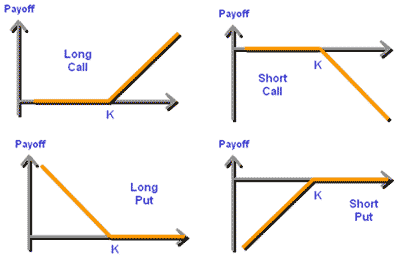

### Options Theory

Let's assume asset **returns** follow a normal distribution.

More specifically, let's assume prices follow a log-normal distribution, which means that **log-prices follow a normal distribution**. We can describe this evolution of prices as a Geometric Brownian Motion.

$$\frac{dS_t}{S_t} = \mu dt + \sigma dW_t$$ 

Where $S_t$ is the underlying, $\sigma$ is the **volatility**, and $W_t$ is a Brownian Motion. A Brownian Motion is a continuous stochastic process that has independent, normally distributed increments.

You can prove that the solution to this equation is [1]:

$$S_t=S_0\exp \left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)t+\sigma W_{t}\right) \Rightarrow \ln {\frac {S_{t}}{S_{0}}}=\left(\mu -{\frac {\sigma ^{2}}{2}}\,\right)t+\sigma W_{t}, \;\;\; W_t \sim N(0,t)$$

So log-returns from time 0 to time t are normally distributed with variance $\sigma^2 t$. This is called the **Black-Scholes** model.

If you assume that asset prices follow the process above, you can prove that there's a closed form solution for a call option fair price:

$$c(S_t) = E[(S_t - 0)^+]=f(S_t, \sigma, t, K, r)$$

Where $S_t$ is the underlying, $\sigma$ is the volatility K is the option's strike, t is the time to expiration, and r is the risk-free interest rate.

Importantly for us, given everything else fixed, **we have a one-to-one relationship between an option's price and its volatility** $\sigma$.

So, what does a "fair" option price mean? Consider $\Delta = \frac{d C}{d S_t}$, the derivative of the call price with respect to the underlying price, or the **delta**. You can build a hedged portfolio: $C(S_t) - \Delta S_t$

Options prices are a convex function of $S_t$. This means that, all else equal, our hedged porfolio will always make money, whether the underlying goes up or down! You can see that in the below above, to the left.

In reality, time moves as the underlying's price moves, and time pushes the option price towards its terminal value. Again look at the picture below, on the left.

You can prove that, if the underlying follows a geometric brownian motion as above, with a fixed volatility $\sigma$, and if you hedge at every instant, updating your delta, you will obtain the option price above with probability one! In other words, the price of the call is fair, as you can replicate it by dynamically trading the underlying. You are capturing the convexity of the call price, or $\Gamma = \frac{d^2 C}{d S_t^2}$, the **gamma**. This is what the image on the right represents.

This result can generalize to much more complicated stochastic processes, and is part of a result know as the Fundamental Theorem of Asset Pricing. For an in-depth discussion, see [2]



Let's assume asset **returns** follow a normal distribution.

More specifically, let's assume prices follow a log-normal distribution, which means that **log-prices follow a normal distribution**. We can describe this evolution of prices as a Geometric Brownian Motion.

$$\frac{dS_t}{S_t} = \mu dt + \sigma dW_t$$ 

Where $S_t$ is the underlying, $\sigma$ is the **volatility**, and $W_t$ is a Brownian Motion. A Brownian Motion is a continuous stochastic process that has independent, normally distributed increments.

You can prove that the solution to this equation is [1]:

$$S_t=S_0\exp \left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)t+\sigma W_{t}\right) \Rightarrow \ln {\frac {S_{t}}{S_{0}}}=\left(\mu -{\frac {\sigma ^{2}}{2}}\,\right)t+\sigma W_{t}, \;\;\; W_t \sim N(0,t)$$

So log-returns from time 0 to time t are normally distributed with variance $\sigma^2 t$. This is called the **Black-Scholes** model.

If you assume that asset prices follow the process above, you can prove that there's a closed form solution for a call option fair price:

$$c(S_t) = E[(S_t - 0)^+]=f(S_t, \sigma, t, K, r)$$

Where $S_t$ is the underlying, $\sigma$ is the volatility K is the option's strike, t is the time to expiration, and r is the risk-free interest rate.

Importantly for us, given everything else fixed, **we have a one-to-one relationship between an option's price and its volatility** $\sigma$.

So, what does a "fair" option price mean? Consider $\Delta = \frac{d C}{d S_t}$, the derivative of the call price with respect to the underlying price, or the **delta**. You can build a hedged portfolio: $C(S_t) - \Delta S_t$

Options prices are a convex function of $S_t$. This means that, all else equal, our hedged porfolio will always make money, whether the underlying goes up or down! You can see that in the below above, to the left.

In reality, time moves as the underlying's price moves, and time pushes the option price towards its terminal value. Again look at the picture below, on the left.

You can prove that, if the underlying follows a geometric brownian motion as above, with a fixed volatility $\sigma$, and if you hedge at every instant, updating your delta, you will obtain the option price above with probability one! In other words, the price of the call is fair, as you can replicate it by dynamically trading the underlying. You are capturing the convexity of the call price, or $\Gamma = \frac{d^2 C}{d S_t^2}$, the **gamma**. This is what the image on the right represents.

This result can generalize to much more complicated stochastic processes, and is part of a result know as the Fundamental Theorem of Asset Pricing. For an in-depth discussion, see [2]


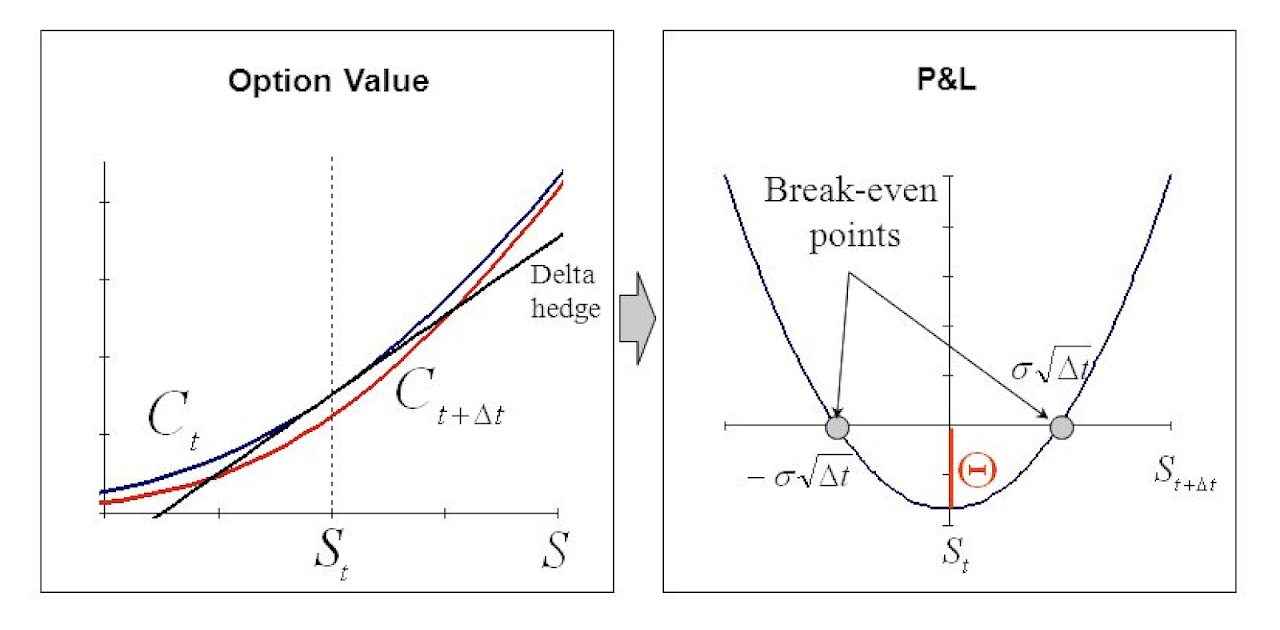



In reality, asset returns don't follow a normal distribution. However, there is still a one-to-one relationship between an option price and the sigma implied by the Black-Scholes model, known as the implied volatility. What happens if you calculate the implied volatility from every option price for a specific expiration? It looks like this:

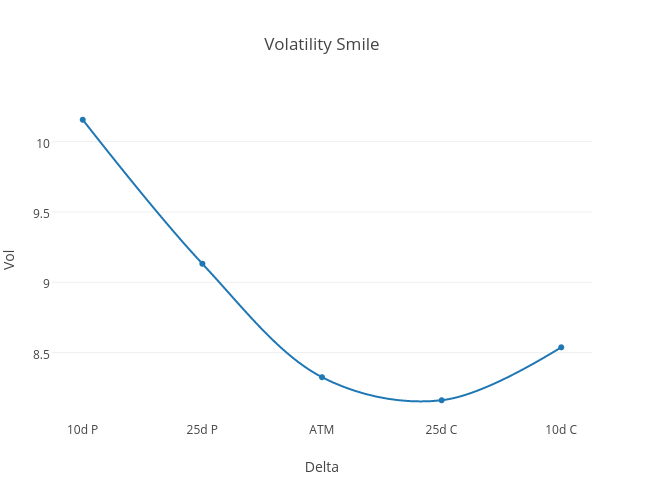

What is this graphic telling us? It's giving us an indication of how far from a normal distribution options prices think the underlying's returns are. It's telling us that, if the market goes down, the market's realized volatility will most likely increase, and the option price must be higher to compensate the seller, who will lose through more volatility while delta hedging.  It's giving us a market estimate of the distribution of the underlying as price and time move!


### Black Model

Black, or Black-76 model, is a modification of Black-Scholes for fowards/futures. You can look at Shreve's book in the literature for a proof.

In Black-Scholes, you need to calculate the price of the forward (futures) to derive the options price. This can be problematic as different assets have different forward price calculations. Index futures derive their price from interest rates and dividends. Commodities from storage costs and seasonality. Currencies from local and foreign interest rate as well as cross-currency basis

In Black model, you already have these calculations taken into account. you only need to know the interest rate to discount future cashflows to present value. 

We refer the reader to https://www.glynholton.com/notes/black_1976/ for the formulas for call and put prices, as well as greek calculations.  The logic behind these functions is implemented in the opts module.